
# Interatomic Potentials

This notebook accompanies the lecture material on interatomic potentials, following the structure and content from the slides.

---

## 1. Pair Potentials

Interatomic potentials describe the energy between atoms as a function of their positions. The simplest category are **pair potentials**, which assume that the total energy of a system can be described as a sum over **interactions between all pairs of atoms**, independent of their surroundings.

---

### Mathematical Form

The general form of a pair potential is:

$$
U = \frac{1}{2} \sum_{i \neq j} \phi(r_{ij})
$$

- $U$ is the total potential energy of the system.
- $\phi(r_{ij})$ is the potential energy between atoms $i$ and $j$, which depends only on their distance $r_{ij}$.
- The factor $\frac{1}{2}$ avoids double-counting each pair.

This approach is conceptually simple and computationally efficient. However, it assumes that atomic interactions are independent of the environment, which is not always physically accurate.

---

### Examples: Lennard-Jones and Morse Potentials

Two widely used forms of pair potentials are:

#### Lennard-Jones Potential

The **Lennard-Jones (LJ)** potential is defined as:

$$
\phi_{\text{LJ}}(r) = 4\epsilon \left[ \left( \frac{\sigma}{r} \right)^{12} - \left( \frac{\sigma}{r} \right)^6 \right]
$$

- $\epsilon$: Depth of the potential well (how strongly two atoms attract).
- $\sigma$: Distance at which the potential is zero.
- The $r^{-12}$ term represents short-range repulsion, and the $r^{-6}$ term describes van der Waals attraction.

The LJ potential is widely used in modeling noble gases and molecular interactions, especially in coarse-grained models and biomolecular simulations.

#### Morse Potential

The **Morse** potential is a more physically realistic model for chemical bonds:

$$
\phi_{\text{Morse}}(r) = D \left[ e^{-2a(r - r_0)} - 2e^{-a(r - r_0)} \right]
$$

- $D$: Bond dissociation energy.
- $r_0$: Equilibrium bond length.
- $a$: Controls the width of the potential well.

Unlike LJ, the Morse potential can model bond vibrations more accurately, making it a better choice for materials with well-defined bonding behavior (e.g., diatomic molecules).

---

### Interactive Comparison

Use the widget below to interactively explore the shape of the Lennard-Jones and Morse potentials. You can tune the parameters and observe how they affect the equilibrium distance, bond strength, and steepness of the potential well.

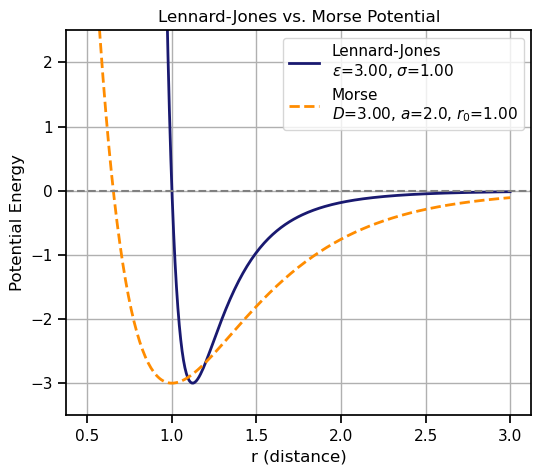

In [1]:
# EXECUTE THIS CELL
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("notebook")
from ipywidgets import interact, FloatSlider

def compare_lj_morse(epsilon=3.0, sigma=1.0, D=3.0, a=2.0, r0=1.0):
    r = np.linspace(0.5, 3.0, 300)

    # Lennard-Jones potential
    phi_lj = 4 * epsilon * ((sigma / r)**12 - (sigma / r)**6)
    
    # Morse potential
    phi_morse = D * (np.exp(-2 * a * (r - r0)) - 2 * np.exp(-a * (r - r0)))
    
    plt.figure(figsize=(6, 5))
    plt.plot(r, phi_lj, label=f'Lennard-Jones\n$\\epsilon$={epsilon:.2f}, $\\sigma$={sigma:.2f}', lw=2, color='midnightblue')   
    plt.plot(r, phi_morse, label=f'Morse\n$D$={D:.2f}, $a$={a}, $r_0$={r0:.2f}', linestyle='--', lw=2, color='darkorange')
    
    plt.xlabel("r (distance)")
    plt.ylabel("Potential Energy")
    plt.title("Lennard-Jones vs. Morse Potential")
    plt.grid(True)
    plt.axhline(0, color='gray', linestyle='--')
    plt.legend()
    plt.ylim(-3.5, 2.5)
    plt.show()

compare_lj_morse()

In [2]:
interact(compare_lj_morse,
         epsilon=FloatSlider(value=3.0, min=0.1, max=5.0, step=0.1, description='ε (LJ)'),
         sigma=FloatSlider(value=1.0, min=0.5, max=2.0, step=0.1, description='σ (LJ)'),
         D=FloatSlider(value=3.0, min=0.1, max=5.0, step=0.1, description='D (Morse)'),
         a=FloatSlider(value=2.0, min=0.5, max=5.0, step=0.1, description='a (Morse)'),
         r0=FloatSlider(value=1.0, min=0.5, max=2.0, step=0.05, description='r₀ (Morse)'));

interactive(children=(FloatSlider(value=3.0, description='ε (LJ)', max=5.0, min=0.1), FloatSlider(value=1.0, d…

### Shortcomings of Pair Potentials

Despite their simplicity, pair potentials have several critical limitations:

#### a. **Linear Additivity**

Pair potentials are linearly additive, meaning the energy contribution of each pair of atoms is added up directly. This leads to the **bond energy scaling linearly** with the coordination number $Z$.

For a system using **pair potentials**, the total energy is:

$$
U = \frac{1}{2} \sum_{i \neq j} \phi(r_{ij})
$$

Assume:
- All atoms are arranged symmetrically.
- Each atom has $Z$ neighbors at the same distance $r_0$.

Then the **cohesive energy per atom** is approximately:

$$
U_{\text{coh}}^{\text{pair}} \approx \frac{1}{2} Z \cdot \phi(r_0)
$$

This is **linear in $Z$**, the coordination number.


##### Real Behavior: Saturation

In reality, the **bond energy saturates** due to many-body physics (electron density sharing, screening, etc.). This is observed in tight-binding and EAM-like models.

A simplified empirical form used to approximate this behavior is:

$$
U_{\text{coh}}^{\text{real}} \propto -\sqrt{Z}
$$

This captures the **sublinear growth** of cohesive energy with coordination.

This form can be derived from the **second-moment approximation of tight-binding**, where the cohesive energy is proportional to the square root of the bandwidth, and the bandwidth increases roughly linearly with the number of neighbors.


---

##### **Interpretation**

- The **pair potential model** overestimates the cohesive energy at higher coordination because it treats each bond as contributing independently.
- The **realistic model** captures the idea that adding more neighbors helps less and less — a **saturation effect**.
- This discrepancy is one reason why **pair potentials fail** for materials where coordination varies significantly (e.g., metals, surfaces, defects).

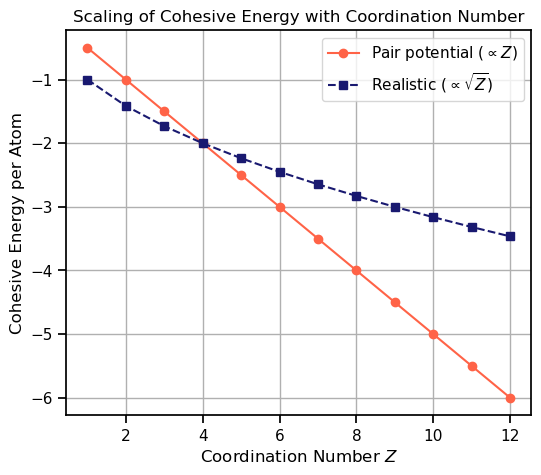

In [3]:
# EXECUTE THIS CELL
import numpy as np
import matplotlib.pyplot as plt

Z = np.arange(1, 13)  # coordination numbers from 1 to 12
phi = -1.0            # example pair potential value (arbitrary units)

# Pair potential model: linear scaling
U_pair = 0.5 * Z * phi

# Realistic model: square root scaling
U_realistic = phi * np.sqrt(Z)

plt.figure(figsize=(6, 5))
plt.plot(Z, U_pair, 'o-', label=r'Pair potential ($\propto Z$)', color='tomato')
plt.plot(Z, U_realistic, 's--', label=r'Realistic ($\propto \sqrt{Z}$)', color='midnightblue')
plt.xlabel('Coordination Number $Z$')
plt.ylabel('Cohesive Energy per Atom')
plt.title('Scaling of Cohesive Energy with Coordination Number')
plt.grid(True)
plt.legend()
plt.show()

#### b. **Cauchy Relation Violation**

In cubic crystals, pair potentials satisfy the **Cauchy relation** by construction:

$$
c_{12} = c_{44}
$$

However, experimental data show that most real materials — especially metals and semiconductors — **violate this condition**. This is because real materials experience angular and many-body interactions, which pair potentials cannot capture.

---

#### c. **Vacancy Formation Energy**

Pair potentials often **overestimate vacancy formation energies**, sometimes making them nearly as large as cohesive energies. This is due to the lack of relaxation effects around the defect site, which are important in reality but not properly captured in simple pairwise models.

---

### Summary

| Feature                     | Lennard-Jones            | Morse                     |
|----------------------------|--------------------------|---------------------------|
| Use case                   | Noble gases, weak bonds  | Diatomic bonds, molecules |
| Attractive term            | $\propto r^{-6}$     | $\propto e^{-a(r - r_0)}$ |
| Short-range repulsion      | $\propto r^{-12}$    | $\propto e^{-2a(r - r_0)}$ |
| Parameters                 | $\epsilon, \sigma$   | $D, a, r_0$           |
| Limitation                 | No bond saturation       | No angular dependence     |

## 2. Ionic Potentials

Ionic potentials are used to model materials composed of charged atoms or ions, such as salts and many ceramic oxides. In these systems, long-range electrostatic interactions play a dominant role in determining structure and stability.

### Mathematical Form

The total potential energy of a collection of ions can be expressed as (Born, 1923):

$$
U = \sum_{i \neq j} \left( \frac{q_i q_j}{4 \pi \varepsilon_0 r_{ij}} + \phi_{\text{rep}}(r_{ij}) \right)
$$

Here:
- $q_i$ and $q_j$ are the effective charges of ions $i$ and $j$
- $r_{ij}$ is the distance between them
- $\phi_{\text{rep}}(r_{ij})$ is a short-range repulsive term
- $\varepsilon_0$ is the vacuum permittivity

The **first term** models the Coulomb attraction or repulsion between charged ions, while the **second term** is needed to prevent the system from collapsing and to account for the Pauli exclusion principle at short distances.

A simple form for the repulsion is:

$$
\phi_{\text{rep}}(r_{ij}) = \frac{A}{r_{ij}^n}
$$

or an exponential form:

$$
\phi_{\text{rep}}(r_{ij}) = A \exp(-B r_{ij})
$$

### Shell Model for Polarizability

To account for **ionic polarizability**, the **shell model** is often used. In this model:
- Each ion is represented by a core (massive, carrying the nuclear charge) and a shell (massless, representing the valence electrons).
- The shell is connected to the core via a harmonic spring.

When an electric field is applied, the shell displaces relative to the core, mimicking the electronic polarization. The resulting energy includes a spring term:

$$
U_{\text{shell}} = \frac{1}{2} k (r_{\text{core}} - r_{\text{shell}})^2
$$

This adds an internal degree of freedom to each atom and allows the simulation to capture dielectric response and phonon softening.

### Interactive Exploration

An effective way to understand ionic potentials is to visualize how energy changes as two oppositely or equally charged ions approach each other. This can be explored interactively with sliders to control:
- Charge values $q_i$ and $q_j$
- Strength and range of the repulsion
- Whether the interaction is attractive or repulsive

In [4]:
# EXECUTE THIS CELL
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, VBox

def ionic_potential(q1=1.0, q2=-1.0, A=1.0, B=3.0):
    epsilon_0 = 1  # simplified units: set 4 * pi * epsilon_0 = 1
    r = np.linspace(0.2, 1.5, 300)
    
    # Coulomb term (note: sign depends on q1*q2)
    U_coulomb = (q1 * q2) / r
    
    # Exponential repulsion
    U_rep = A * np.exp(-B * r)
    
    # Total potential
    U_total = U_coulomb + U_rep

    plt.figure(figsize=(6, 5))
    plt.plot(r, U_coulomb, label='Coulomb', linestyle='--', color='midnightblue')
    plt.plot(r, U_rep, label='Repulsion', linestyle='--', color='tomato')
    plt.plot(r, U_total, label='Total', linewidth=2, color='purple')
    
    plt.xlabel('Distance r')
    plt.ylabel('Potential Energy')
    plt.title(r'$U(r) = \frac{q_1 q_2}{r} + A e^{-B r}$')
    plt.axhline(0, color='gray', linestyle='--')
    plt.grid(True)
    plt.legend()
    plt.ylim(-10, 10)
    plt.show()

interact(
    ionic_potential,
    q1=FloatSlider(value=2.0, min=-2.0, max=2.0, step=0.1, description='q_1'),
    q2=FloatSlider(value=-2.0, min=-2.0, max=2.0, step=0.1, description='q_2'),
    A=FloatSlider(value=10.0, min=0.1, max=10.0, step=0.1, description='A'),
    B=FloatSlider(value=0.5, min=0.5, max=10.0, step=0.1, description='B'),
);


interactive(children=(FloatSlider(value=2.0, description='q_1', max=2.0, min=-2.0), FloatSlider(value=-2.0, de…

### Applications

Ionic potentials are widely used for:
- Alkali halides (NaCl, KBr, etc.)
- Oxides ($\mathrm{Al_2O_3}$, MgO, $\mathrm{ZrO_2}$)
- Solid electrolytes and perovskite oxides

They are particularly suited to modeling ionic crystals, lattice vibrations, and defect energetics in these systems.

### Limitations

- Long-range Coulomb interactions must be summed over large numbers of atoms, often using **Ewald summation** or **particle mesh methods**.
- Shell model simulations are more computationally intensive.
- Cannot handle bond directionality or covalent character.

## 3. Pair Functionals

While **pair potentials** treat each bond independently, **pair functionals** incorporate many-body effects in an approximate but efficient way. The total energy is no longer a simple sum over pair interactions, but instead includes **environment-dependent contributions** that account for the influence of surrounding atoms on a given atom.

This class includes methods such as:

- **Embedded Atom Method (EAM)**  
- **Second-Moment Tight Binding (SMTB)**  

These are particularly successful in modeling **metals**, where bonding is delocalized and influenced by the electron density of nearby atoms.

---

### Embedded Atom Method (EAM)

The **Embedded Atom Method (EAM)**, developed by Daw and Baskes, is one of the most widely used empirical many-body potential forms for metals and alloys.

The total energy is given by:

$$
U = \sum_i F(\rho_i) + \frac{1}{2} \sum_{i \neq j} \phi(r_{ij})
$$

where:

- $\phi(r_{ij})$ is a pairwise potential term representing repulsion between atoms $i$ and $j$.
- $F(\rho_i)$ is the **embedding function**, describing the energy cost of placing atom $i$ into a background electron density $\rho_i$.
- $\rho_i$ is the **electron density at site $i$**, given by a sum over neighboring atoms:

$$
\rho_i = \sum_{j \neq i} f_j(r_{ij})
$$

Here, $f_j(r)$ is a density contribution from atom $j$ to atom $i$ as a function of their distance.

---

### Physical Interpretation

- The pairwise term $\phi(r)$ handles **core-core repulsion**.
- The embedding function $F(\rho)$ introduces a **many-body interaction**.
- The electron density felt by an atom increases with the number and proximity of neighbors.

A common form for $F(\rho)$ is:

$$
F(\rho) = -A \sqrt{\rho}
$$

This is motivated by the **second moment approximation** to the tight-binding model of metallic bonding, where the **bond energy is proportional to the square root of the bandwidth**, which itself grows with coordination.

---

### Relation to SMTB

In the **Second-Moment Tight Binding (SMTB)** approximation:

- Cohesive energy is proportional to $-\sqrt{\sum_{j} \beta_{ij}^2}$, where $\beta_{ij}$ are hopping integrals between atoms.
- These hopping integrals can be approximated as distance-dependent functions $\beta(r_{ij})$.

Thus, SMTB and EAM share the same underlying philosophy: **bond energy arises from overlapping orbitals**, and **saturates with coordination**.

---

### Limitations of EAM

- It assumes **spherical symmetry** of the electron density.
- Cannot handle **directional bonding** (like in covalent or ionic systems).
- May require element-specific fitting of all functions involved.

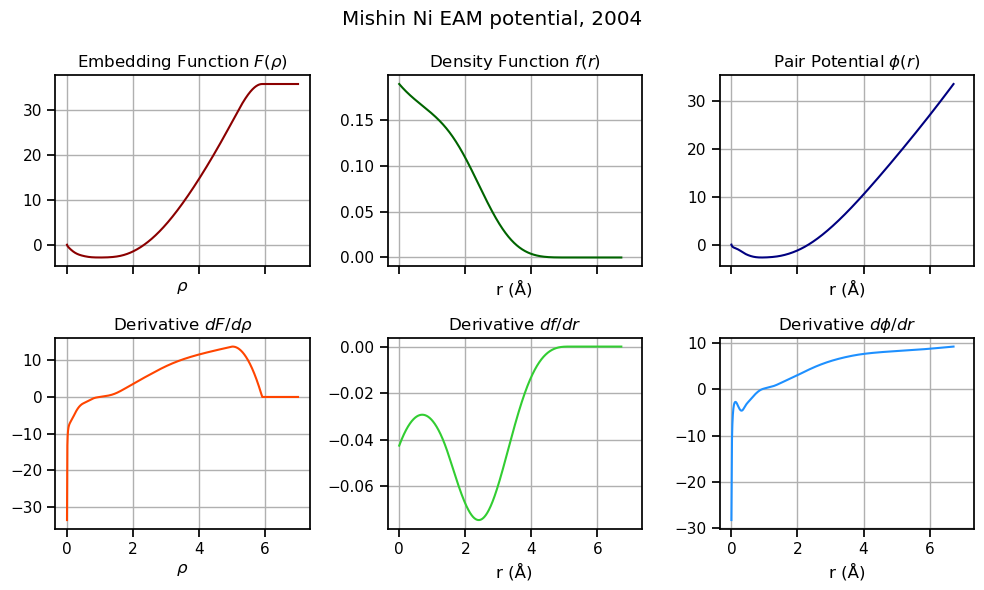

In [5]:
# EXECUTE THIS CELL
import numpy as np
import matplotlib.pyplot as plt

# === Load the EAM file ===
file_path = "NiAl.eam.alloy"  # Change this path if needed

with open(file_path, "r") as f:
    lines = f.readlines()

# === Read metadata from line 5 ===
line5 = lines[4].split()
nF = int(line5[0])            # number of F(ρ) points
delta_rho = float(line5[1])   # spacing for ρ
nR = int(line5[2])            # number of f(r), φ(r) points
delta_r = float(line5[3])     # spacing for r
r_cut = float(line5[4])       # cutoff

# === Parse function blocks for Ni ===
start_F = 6
end_F = start_F + nF
F_rho = np.array([float(lines[i]) for i in range(start_F, end_F)])
rho_values = np.arange(nF) * delta_rho

start_f = end_F
end_f = start_f + nR
f_r = np.array([float(lines[i]) for i in range(start_f, end_f)])
r_values = np.arange(nR) * delta_r

start_phi = end_f + 1  # skip line containing Al header
end_phi = start_phi + nR
phi_r = np.array([float(lines[i]) for i in range(start_phi, end_phi)])

# === Compute derivatives ===
dF_drho = np.gradient(F_rho, rho_values)
df_dr = np.gradient(f_r, r_values)
dphi_dr = np.gradient(phi_r, r_values)

# === Plotting ===
fig, axs = plt.subplots(2, 3, figsize=(10, 6), sharex=True)

# Embedding function F(ρ)
axs[0, 0].plot(rho_values, F_rho, color='darkred')
axs[0, 0].set_title(r'Embedding Function $F(\rho)$')
axs[0, 0].set_xlabel(r'$\rho$')
axs[0, 0].grid(True)

# Derivative dF/dρ
axs[1, 0].plot(rho_values, dF_drho, color='orangered')
axs[1, 0].set_title(r'Derivative $dF/d\rho$')
axs[1, 0].set_xlabel(r'$\rho$')
axs[1, 0].grid(True)

# Electron density function f(r)
axs[0, 1].plot(r_values, f_r, color='darkgreen')
axs[0, 1].set_title(r'Density Function $f(r)$')
axs[0, 1].set_xlabel('r (Å)')
axs[0, 1].grid(True)

# Derivative df/dr
axs[1, 1].plot(r_values, df_dr, color='limegreen')
axs[1, 1].set_title(r'Derivative $df/dr$')
axs[1, 1].set_xlabel('r (Å)')
axs[1, 1].grid(True)

# Pair potential φ(r)
axs[0, 2].plot(r_values, phi_r, color='navy')
axs[0, 2].set_title(r'Pair Potential $\phi(r)$')
axs[0, 2].set_xlabel('r (Å)')
axs[0, 2].grid(True)

# Derivative dφ/dr
axs[1, 2].plot(r_values, dphi_dr, color='dodgerblue')
axs[1, 2].set_title(r'Derivative $d\phi/dr$')
axs[1, 2].set_xlabel('r (Å)')
axs[1, 2].grid(True)

plt.suptitle('Mishin Ni EAM potential, 2004')
plt.tight_layout()
plt.show()

## 4. Cluster Potentials

Cluster potentials go beyond simple pairwise interactions by explicitly incorporating **three-body terms**. These account for **angular dependencies**, which are crucial in materials with **directional bonding** — like silicon or water.

### General Form

The use of angular forces to describe the behavior of **open, covalently bonded structures** dates back to Keating, who introduced higher-order expansions to model small deviations from equilibrium geometries in crystals.

**Cluster potentials** extend this idea by incorporating **three-body** and higher-order interaction terms. These terms explicitly include **bond-angle dependence**, enabling the potential to capture a much broader range of local atomic configurations compared to purely pairwise models. The general form is:

$$
U(\{r_{ij}\}) = \sum_{i<j} \phi_2(r_{ij}) + \sum_{i<j<k} \phi_3(r_{ij}, r_{ik}, \theta_{jik})
$$

Here:
- $\phi_2(r_{ij})$ is the radial pair potential,
- $\phi_3(r_{ij}, r_{ik}, \theta_{jik})$ is the three-body angular term,
- and $\theta_{jik}$ is the angle between atoms $j$–$i$–$k$.

These potentials typically include **cutoff functions**, ensuring that both two-body and three-body interactions are **short-ranged** and decay to zero beyond a certain distance. This makes them computationally efficient and well-suited to modeling materials with **directional bonding**, such as semiconductors.

---

### Interpretation

- The three-body term ensures that atoms **prefer a specific angle** between neighbors.
- This is crucial for covalent crystals like **Si, Ge**, and complex oxides.
- The exponential cutoffs ensure **short-range interactions** and computational efficiency.

---

### Interactive Plot: Angular Term

Let’s plot the **angular part** of the three-body term for varying values of $\theta$ and a few preferred angles.

In [6]:
# EXECUTE THIS CELL
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

def plot_sw_angle_term(theta0_deg=109.47, lam=1.0):
    theta = np.linspace(0, np.pi, 300)
    theta0 = np.radians(theta0_deg)
    angular_term = lam * (np.cos(theta) - np.cos(theta0))**2

    plt.figure(figsize=(6, 5))
    plt.plot(np.degrees(theta), angular_term, color='teal')
    plt.axvline(theta0_deg, linestyle='--', color='gray', label=r'Preferred $\theta_0$')
    plt.xlabel(r'Angle $\theta$ (degrees)')
    plt.ylabel(r'Angular Energy Term')
    plt.title(r'Angular Term: $(\cos \theta - \cos \theta_0)^2$')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

interact(
    plot_sw_angle_term,
    theta0_deg=FloatSlider(value=109.47, min=60, max=180, step=1.0, description='θ₀'),
    lam=FloatSlider(value=1.0, min=0.1, max=5.0, step=0.1, description='λ'),
);

interactive(children=(FloatSlider(value=109.47, description='θ₀', max=180.0, min=60.0, step=1.0), FloatSlider(…

A landmark example is the **Stillinger–Weber (SW) potential** for silicon. SW was the first practical cluster potential to reproduce the **diamond cubic structure** as the most stable configuration. It captures not only the correct equilibrium bond lengths and angles but also accurately reflects the **energetic cost of distorting** the tetrahedral geometry, making it a foundational model for covalent systems.

---

### Stillinger–Weber Potential

Originally designed for **silicon**, the Stillinger–Weber potential uses the form:

#### Two-body term:
$$
\phi_2(r) = A \epsilon \left[ B \left( \frac{\sigma}{r} \right)^p - \left( \frac{\sigma}{r} \right)^q \right] \exp\left( \frac{\sigma}{r - a\sigma} \right)
$$

#### Three-body term:
$$
\phi_3(r_{ij}, r_{ik}, \theta) = \lambda \epsilon \left[ \cos \theta - \cos \theta_0 \right]^2 \exp\left( \frac{\gamma \sigma}{r_{ij} - a\sigma} \right) \exp\left( \frac{\gamma \sigma}{r_{ik} - a\sigma} \right)
$$

- $r_{ij}, r_{ik}$ are pair distances
- $\theta$ is the angle $\angle jik$
- $\cos \theta_0$ defines the preferred bond angle (e.g., tetrahedral for silicon)

The **three-body term** contains an angular component of the form:

$$
\left( \cos \theta_{jik} + \frac{1}{3} \right)^2
$$

This function is minimized when $\cos \theta = -\frac{1}{3}$, corresponding to the **tetrahedral angle** $\theta \approx 109.47^\circ$. As a result, the potential energetically favors tetrahedral coordination and stabilizes the **diamond cubic lattice** found in silicon.